In [1]:
import tensorflow as tf
from keras import *
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [6]:
image_augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [33]:
train_generator = image_augmentation.flow_from_directory(
    directory='C:\\Users\\prath\\Documents\\PetImages',
    target_size=(128, 128),
    batch_size=128,
    class_mode='binary'
)

Found 25000 images belonging to 2 classes.


In [34]:
validation_augmentation = ImageDataGenerator(
    rescale=1./255
)

In [36]:
validation_generator= validation_augmentation.flow_from_directory(
    directory='C:\\Users\\prath\\Documents\\AIDL Lab\\Val images',
    target_size=(128,128),
    batch_size=128,
    class_mode='binary'
)

Found 5501 images belonging to 2 classes.


In [38]:
cnn_model = VGG16(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

In [39]:
cnn_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [40]:
# we are not going to update the weights so we will freeze the layers 
for layer in cnn_model.layers:
    layer.trainable = False

In [46]:
# building the model

model=Sequential()
model.add(cnn_model)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [48]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# history=model.fit(train_generator,steps_per_epoch=8, epochs=5, validation_data=validation_generator)
history=model.fit(train_generator,steps_per_epoch=8, epochs=5)

Epoch 1/5
8/8 [==============================] - 245s 30s/step - loss: 2.8012 - accuracy: 0.5205
Epoch 2/5
4/8 [==============>...............] - ETA: 2:00 - loss: 0.6837 - accuracy: 0.5547

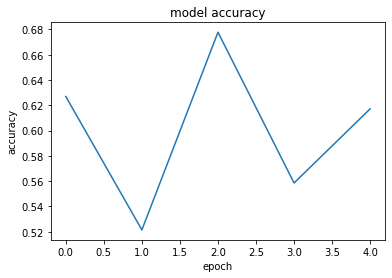

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()